In [1]:
%run Methods.ipynb

In [28]:
### LMO_N_1 RUN 1
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB03\LMO_N_1\1'
area = np.pi * (0.5 **2) # cm2
thickness = 90
setup_files(path)
name = 'LMO_N_1'
lmo_n_1 = cc(path, area, thickness, name)
# cc_plot(lmo_n_1, color_map, 100)
# dq_dv_plot(lmo_n_1, color_map, 100)


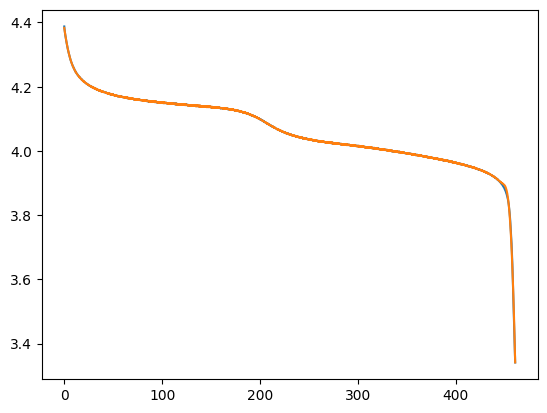

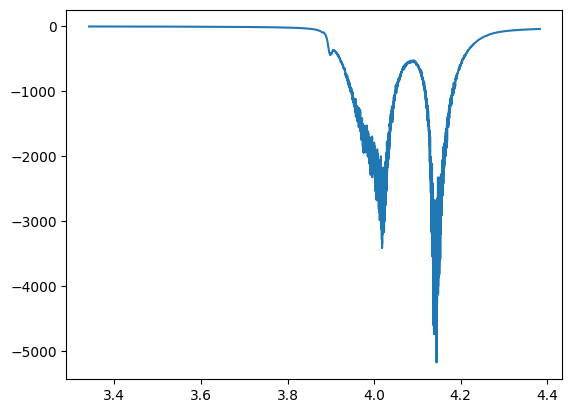

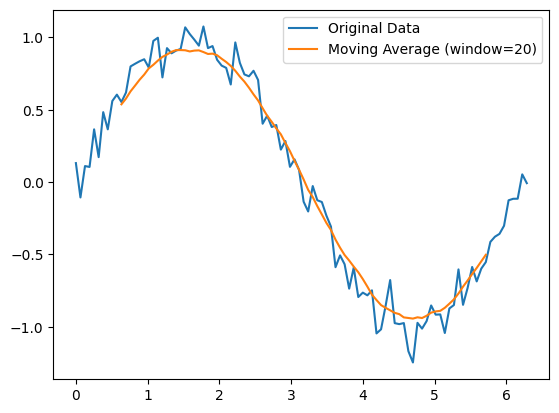

In [98]:

# Generate example data with noise
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Apply moving average filter
window_size = 20
y_smooth_ma = pd.Series(y).rolling(window=window_size, center=True).mean().values

# Plot the original and smoothed data
plt.plot(x, y, label='Original Data')
plt.plot(x, y_smooth_ma, label=f'Moving Average (window={window_size})')
plt.legend()
plt.show()

In [32]:
crates = [1, 2, 5, 10, 20, 50, 100]
times = [3600/i for i in crates]
a  = np.random.permutation(times)
a

array([1800.,  360.,  180., 3600.,   72.,   36.,  720.])

In [2]:
tio2_mw = 79.866 #g/mol
tio2_density = 4.23
n = 0.5
qth_tiO2_grav = q_th_grav(n, tio2_mw)
qth_tio2_vol = q_th_vol(n, tio2_mw, tio2_density)
print(f'{round(qth_tiO2_grav)} mAh/g', f'{round(qth_tio2_vol)} mAh/cm3')

thick = 9e-7
vol = np.pi * thick
charge = 4.61e-3
cap = charge / (3.6 * vol)
cap * 100 / 710 # ~ 64% theoretical capacity

168 mAh/g 710 mAh/cm3


63.78927905178556

In [5]:
mw = 859.23 # g/mol
qth_prussian = q_th_grav(2, mw)
print(f'{round(qth_prussian)} mAh/g')

62 mAh/g
